# Lab Deep Learning / Multi-Layer Perceptron for binary-classification / in pytorch

**Author: geoffroy.peeters@telecom-paris.fr**

**Version**: 2020/09/21

For any remark or suggestion, please feel free to contact me.



## Objective:

The objective of this lab is to develop a two hidden layers MLP to perform **binary classification**.

We will use a MLP with 2 hidden layer with $n_{h1}=20$ and $n_{h2}=10$ hidden units and ```relu``` activation functions.
You will perform 10000 iterations (epochs) of SGD to find the parameters.

Note: for this lab, we do not separate the dataset into a train, validation and test part.

### Data normalization

You should normalize the data to zero mean and unit standard deviation

### Model

There are various ways to write NN model in pytorch. 

In this lab, you will write three different implementations:
- **Model A**: manually defining the parameters (W1,b1,W2,b2,W3,b3), writing the forward equations, writting the loss equation, calling the .backward() and manually updating the weights using W1.grad. You will write the loop to perform 1000 epochs.
- **Model B**: using the Sequential class of pytorch
- **Model C**: a custom torch.nn.Module class for this.

For Model B and C, you will use the ready made loss and optimization from the nn and optim packages. You can use the same code to optimize the parameters of Model B and C.

### Loss

Since we are dealing with a binary classification problem, we will use a Binary Cross Entropy loss (use ```torch.nn.BCELoss``` for Model B and C).

### Parameters update/ Optimization

For updating the parameters, we will use as optimizer a simple SGD algorithm (use ```torch.optim.SGD``` for Model B and C) with a learning rate of 0.1.

Don't forget that an optimizer is applied to a set of parameters (```my_model.parameters()``` gives the parameters of the network for Model B and C).
Once the gradients have been computed (after the backpropagation has been performed), you can perform one step of optimization (using ```optimizer.step()``` for Model B and C).

### Backward propagation

Backpropagation is automatically performed in pytorch using the ```autograd``` package. 
First, reset the gradients of all parameters (using ```optimizer.zero_grad()``` for Model B and C), then perform the backpropagation ```loss.backward()```. 

## Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

## Documentation:
- NN: https://pytorch.org/docs/stable/nn.html
- Autograd: https://pytorch.org/docs/stable/autograd.html
- Optim: https://pytorch.org/docs/stable/optim.html


## Load the python packages

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

student = True

In [ ]:
print(torch.__version__)

1.6.0+cu101


## Dataset

We take the usual circle dataset from sklearn.

In [ ]:
from sklearn import datasets
X_np, y_np = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.5)

We convert the ```numpy tensors``` to ```torch tensors```. 
The difference being that the latters allows to do automatic gradient differentiation (back-propagation).

In [ ]:
X = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np).float()
y = y.view(len(y), 1)

In [ ]:
print(X.size())
print(y.size())
print(X.mean(dim=0))
print(X.std(dim=0))

torch.Size([1000, 2])
torch.Size([1000, 1])
tensor([0.0042, 0.0023])
tensor([0.5999, 0.5880])


## Normalization

In [ ]:
X -= X.mean(dim=0)
X /= X.std(dim=0)
print(X.mean(dim=0))
print(X.std(dim=0))

tensor([ 1.9342e-08, -1.0118e-08])
tensor([1., 1.])


## Definition of the hyper-parameters

In [ ]:
n_in = X.shape[1]
n_h1 = 20
n_h2 = 10
n_out = 1

nb_epoch = 10000
alpha = 0.1

## Model 1 (writing the network equations)

Here, you will define the variables and write the equations of the network yourself (as you would do in numpy).
However you will use ```torch tensors``` instead of ```numpy array```. 

***Why ?*** because torch tensors will allows you to automatically get the gradient. You will use ```loss.backward``` to launch the backpropagation from ```loss```. Then, for all tensors you created and for which you declared ```requires_grad=True```, you will get the gradient of ```loss```with respect to this variable in the field ```.grad```. 

***Example*** ```W1 = torch.tensors(..., requires_grad=True)``` ... ```loss.backward``` will have the gradient $\frac{d Loss}{d W1}$in ```W1.grad```.

Don't forget that the weight $W_1, W_2, \cdots$ matrices should be initialized randomly with small values; while the bias vectors $b_1, b_2, \cdots$can be initialized to zero.

In [ ]:
# --- We first initialize the variables of the network (W1, b1, ...)
if student:
    # --- START CODE HERE (01)    
    W1 = torch.randn(n_in, n_h1) * 0.01
    W1.requires_grad = True
    b1 = torch.zeros(1, n_h1)
    b1.requires_grad = True
    W2 = torch.randn(n_h1, n_h2) * 0.01
    W2.requires_grad = True
    b2 = torch.zeros(1, n_h2)
    b2.requires_grad = True
    W3 = torch.randn(n_h2, n_out) * 0.01
    W3.requires_grad = True
    b3 = torch.zeros(n_out, 1)
    b3.requires_grad = True
    # --- END CODE HERE

# --- We then write a function to perform the forward pass (using pytorch opertaors, not numpy operators)
# --- taking X as input and returing hat_y as output
    
def model(X):
    if student:
        # --- START CODE HERE (02)
        A0 = X    
        Z1 = torch.mm(A0,W1)+b1
        A1 = F.relu(Z1)
        Z2 = torch.mm(A1,W2)+b2
        A2 = F.relu(Z2)
        Z3 = torch.mm(A2,W3)+b3
        A3 = F.sigmoid(Z3)
        hat_y = A3
        # --- END CODE HERE
       
    return hat_y

# --- We then iterate over epochs (we do not perform split into mini-batch here)
# --- For each iteration, we
# ---   a) perform the forward pass, 
# ---   b) compute the loss/cost, 
# ---   c) compute the backward pass to get the gradients of the cost w.r.t. the parameters W1, b1, ...
# ---   d) perform the update of the parameters W1, b1, ...
for num_epoch in range(0, nb_epoch):    

    # --- a) Forward pass: X (n_in, N), hat_y (n_out, N)
    hat_y = model(X)

    # -- We clip hat_y in order to avoid log(0)
    eps = 1e-10
    hat_y = torch.clamp(hat_y, eps, 1-eps)
    
    # --- b) Computing the loss/cost
    if student:
        # --- START CODE HERE (03)
        loss = -(y * torch.log(hat_y) + (1-y) * torch.log(1-hat_y))
        cost = loss.mean()
        # --- END CODE HERE
    
    if num_epoch % 500 == 0:
        print('epoch {}, loss {}'.format(num_epoch, cost))

    # --- c) Backward pass
    cost.backward()
    
    # --- "with torch.no_grad()" temporarily set all the requires_grad flag to false
    with torch.no_grad():
        # --- d) perform the update of the parameters W1, b1, ...
        if student:
            # --- the gradients dLoss/dW1 is stored in W1.grad, dLoss/db1 is stored in b1.grad, ...
            # --- START CODE HERE (04)
            W1 -= alpha * W1.grad
            b1 -= alpha * b1.grad
            W2 -= alpha * W2.grad
            b2 -= alpha * b2.grad
            W3 -= alpha * W3.grad
            b3 -= alpha * b3.grad
            # --- END CODE HERE

    # --- We need to set to zero all gradients (otherwise they are cumulated)
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0, loss 0.693144679069519
epoch 500, loss 0.6931421756744385
epoch 1000, loss 0.6931377649307251
epoch 1500, loss 0.6931291222572327
epoch 2000, loss 0.6931086182594299
epoch 2500, loss 0.6930464506149292
epoch 3000, loss 0.692742109298706
epoch 3500, loss 0.6876626014709473
epoch 4000, loss 0.3343948423862457
epoch 4500, loss 0.2714940905570984
epoch 5000, loss 0.2676021158695221
epoch 5500, loss 0.26653650403022766
epoch 6000, loss 0.26622819900512695
epoch 6500, loss 0.26594436168670654
epoch 7000, loss 0.2657849192619324
epoch 7500, loss 0.2656671404838562
epoch 8000, loss 0.2655820846557617
epoch 8500, loss 0.2655179500579834
epoch 9000, loss 0.26546770334243774
epoch 9500, loss 0.26542747020721436


## Model 2 (using nn.sequential)

Here, you will use the package ```torch.nn``` which comes with a predefined set of layers. The syntax is close to the one of ```keras```(```Sequential```), but differs in the fact that layers are splitted into the matrix multiplication followed by a non-linear activations (```keras```merge both using the ```Dense```layers).

The model created will have all its parameters accessible as a dictionary and can be accessed using ```model.parameters()```. It is therefore a convenient way to write simple sequential networks.

In [ ]:
if student:
    # --- START CODE HERE (05)
    my_model = nn.Sequential (
        nn.Linear(n_in, n_h1),
        nn.ReLU(),
        nn.Linear(n_h1, n_h2),
        nn.ReLU(),
        nn.Linear(n_h2, n_out),
        nn.Sigmoid(),
    )
    # --- END CODE HERE

## Model 3 (using a class definition)

Here, you will write the network using the recommended pytroch way; i.e. by defining a class.
This class inherit from the main class ```torch.nn.Module```.
You only need to write the ```__init__``` method and the ```forward``` method.

In object programming, the ```__init__``` method defines the attributes of your class. Since the attributes of your  network are the parameters to be trained (weights and biases), you should declare in the ```__init``` all the layers that involve parameters to be trained (mostly the ```Linear```layers which perform the matrix multiplication).

The ```forward``` method contains the code of the forward pass itself. It can of course call attributes defined in the ```__init___``` method. It is the method used when calling ```model(x)```.

As before, the model created will have all its parameters accessible as a dictionary and can be accessed using ```model.parameters()```. 

Classes are convenient way to write more complex network than what you can do with ```nn.sequential```. Note that you can actually include a ```nn.sequential``` in your class.

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_in, n_h1, n_h2, n_out):
        super(Net, self).__init__()
        
        if student:
            # --- START CODE HERE (06)
            self.fc1 = nn.Linear(n_in,n_h1)  # hidden layer 1
            self.relu=nn.ReLU()
            self.fc2 = nn.Linear(n_h1,n_h2) # hidden layer 2
            self.fc3 = nn.Linear(n_h2,n_out) # output layer
            self.sigmoid=nn.Sigmoid() # output layer
            # --- END CODE HERE
        
    def forward(self, X):
        
        if student:
            # --- START CODE HERE (07)
            A0 = X
            A1 = self.relu(self.fc1(A0))   # activation function for hidden layer 1
            A2 = self.relu(self.fc2(A1))   # activation function for hidden layer 2
            A3 = self.sigmoid(self.fc3(A2)) # activation function for output layer
            # --- END CODE HERE

        return A3

# --- START CODE HERE
my_model = Net(n_in, n_h1, n_h2, n_out)
# --- END CODE HERE

## Criterion and Optimization for model 2 and model 3

The code of Model 1 is self-contained, i.e. it already contains all necessary instruction to perform forawrd, loss, backward and parameter updates.

When using ```nn.sequential``` (model 2) or a class definition of the network (model 3), we still need to define 
- what we will minimize (the loss to be minimized, i.e. Binary-Cross-Entropy). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)
- how we will minimize the loss, i.e. what parameter update algorithms we will use (SGD, momentum). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)

In [ ]:
if student:
    # --- START CODE HERE (08)
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(my_model.parameters(), lr = alpha)
    # --- END CODE HERE

## Training for model 2 and 3

Having defined the network, the citerion to be minimized and the optimizer, we then perform a loop over epochs (iterations); at each step we
- compute the forward pass by passing the data to the model: ```haty = model(x)```
- compute the the loss (the criterion)
- putting at zero the gradients of all the parameters of the network (this is important since, by default, pytorch accumulate the gradients over time)
- computing the backpropagation (using as before ```.backward()```)
- performing one step of optimization (using ```.step()```)

epoch 0, loss 0.6953634023666382
epoch 500, loss 0.272940456867218
epoch 1000, loss 0.26626449823379517
epoch 1500, loss 0.26235559582710266
epoch 2000, loss 0.2614712715148926
epoch 2500, loss 0.26081880927085876
epoch 3000, loss 0.26018378138542175
epoch 3500, loss 0.2594669461250305
epoch 4000, loss 0.25874215364456177
epoch 4500, loss 0.2580501437187195
epoch 5000, loss 0.2575565278530121
epoch 5500, loss 0.25718656182289124
epoch 6000, loss 0.25687843561172485
epoch 6500, loss 0.25661179423332214
epoch 7000, loss 0.2563847303390503
epoch 7500, loss 0.2561587989330292
epoch 8000, loss 0.2559407353401184
epoch 8500, loss 0.25563180446624756
epoch 9000, loss 0.25531885027885437
epoch 9500, loss 0.25510185956954956


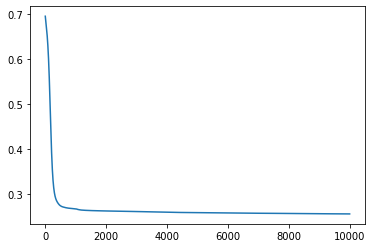

In [ ]:
loss_l = []

for num_epoch in range(nb_epoch):
  
    if student:
        # --- START CODE HERE (09)
        hat_y = my_model(X) # Forward pass: Compute predicted y by passing  x to the model          
        loss = criterion(hat_y,y) # Compute loss 
        # Zero gradients, perform a backward pass, and update the weights. 
        optimizer.zero_grad() # re-init the gradients (otherwise they are cumulated)
        loss.backward() # perform back-propagation
        optimizer.step() # update the weights
        # --- END CODE HERE
        
    loss_l.append(loss)

    if num_epoch % 500 == 0:
        print('epoch {}, loss {}'.format(num_epoch, loss.item()))
        
# ----------------
plt.plot(loss_l)        